In [1]:
import numpy as np

In [2]:
from tree_inference.data_generator import DataGenerator
from tree_inference.tree import MutationTree
from tree_inference.mutation_filter import MutationFilter
from tree_inference import TreeOptimizer

## Simulate a tree

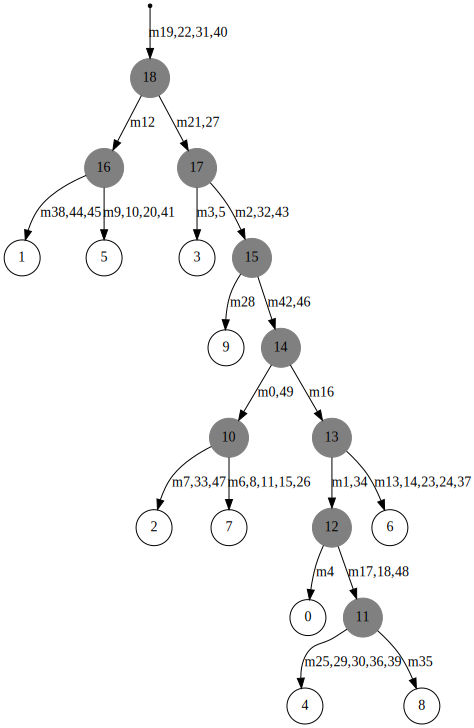

In [3]:
# Generate a random cell lineage tree with 10 samples and 50 mutations
generator = DataGenerator(10, 50)
generator.random_tree()

# Visualize the generated tree
# Cells are represented by white circles
# Ancestor cells are represented by grey circles
# Mutations are indicated on branches
generator.tree.to_graphviz()

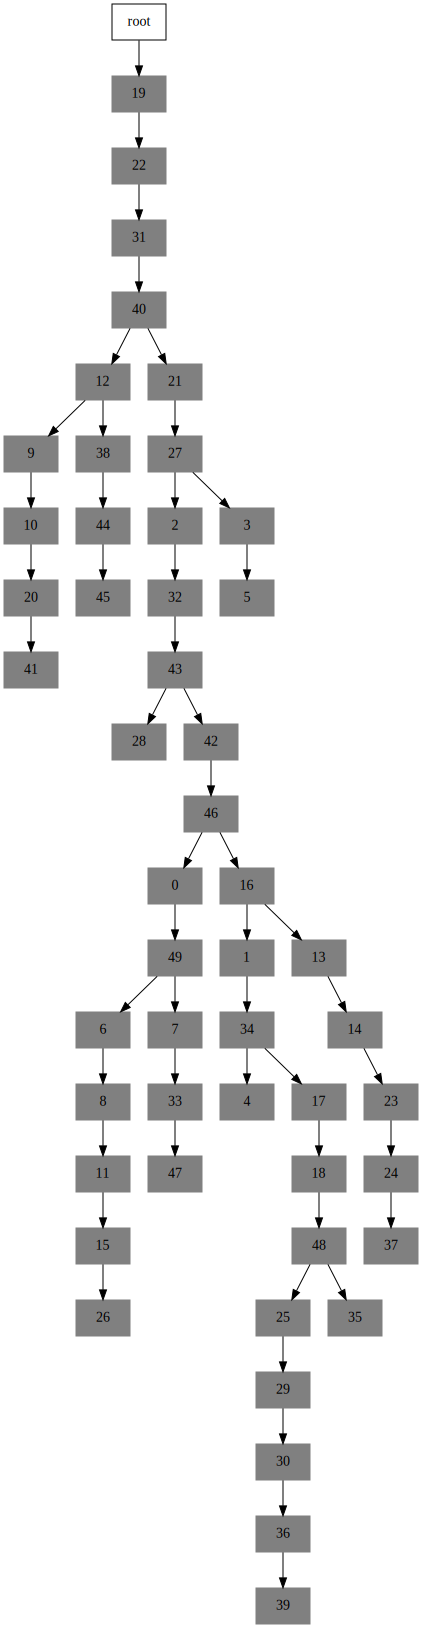

In [4]:
# Convert to mutation tree and visualize it
mut_tree = MutationTree(generator.tree.n_mut)
mut_tree.fit_structure(generator.tree)
mut_tree.to_graphviz()

In [5]:
generator.random_mutations()

In [6]:
# Print the genotype transitions
for gt1, gt2 in zip(generator.gt1, generator.gt2):
    print('%s->%s' % (gt1, gt2))

H->R
A->H
A->H
R->H
A->H
R->H
H->R
A->H
H->R
A->H
H->A
A->H
R->H
A->H
A->H
R->H
A->H
R->H
H->R
R->H
R->H
A->H
H->R
H->A
A->H
H->R
R->H
R->H
R->H
H->A
R->H
R->H
R->H
R->H
H->A
R->H
R->H
H->R
A->H
H->A
H->A
H->R
A->H
R->H
R->H
H->R
H->R
A->H
R->H
H->R


In [7]:
# Generate read counts matries for the tree data
# Samples coverage poisson distribution  []
ref, alt = generator.generate_reads()

In [8]:
# check individual reads
i_cell = 0 # cell index
i_mut = 0 # locus index
print('Cell %d has %d reference reads and %d alternative reads at locus %d' % (i_cell, ref[i_cell,i_mut], alt[i_cell,i_mut], i_mut))

Cell 0 has 4 reference reads and 2 alternative reads at locus 0


### Select mutations to be used for inference

In [9]:
mf = MutationFilter()
selected, gt1, gt2 = mf.filter_mutations(ref, alt, method = 'threshold', t = 0.5)

### In these sites, calculate likelihoods of each cell being mutated / not mutated

In [10]:
llh_mat_1, llh_mat_2 = mf.get_llh_mat(ref[:,selected], alt[:,selected], gt1, gt2)

In [11]:
i_cell = 0
i_mut = 0
print(f'Likelihood of cell {i_cell} being wildtype at locus {i_mut} is {np.exp(llh_mat_1[i_cell,i_mut])}')
print(f'Likelihood of cell {i_cell} being mutated at locus {i_mut} is {np.exp(llh_mat_2[i_cell,i_mut])}')

Likelihood of cell 0 being wildtype at locus 0 is 0.12362508742514275
Likelihood of cell 0 being mutated at locus 0 is 4.5340530858504466e-07


## Tree inference

In [12]:
optimizer = TreeOptimizer()
optimizer.fit(llh_mat_1, llh_mat_2, reversible = True)

In [13]:
optimizer.optimize()

[Cell Tree Space] convergence after 242 steps and 12 move(s).
[Mutation Tree Space] convergence after 230 steps and 0 move(s).
[Cell Tree Space] convergence after 87 steps and 2 move(s).
[Mutation Tree Space] convergence after 230 steps and 0 move(s).
[Cell Tree Space] convergence after 50 steps and 0 move(s).


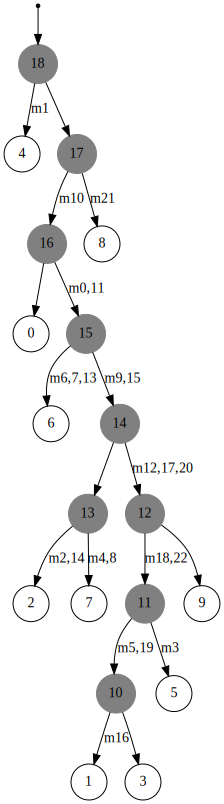

In [14]:
optimizer.ct.to_graphviz()

## Run multiple tests

In [15]:
from test_functions import compare_settings
from plot_functions import make_test_plots

In [21]:
# set up 
generator = DataGenerator(10, 50)
generator.random_tree()
generator.random_mutations()

mf = MutationFilter()

optz1 = TreeOptimizer(spaces=['c'])
optz2 = TreeOptimizer(spaces=['m'])
optz3 = TreeOptimizer(spaces=['c', 'm'])

In [22]:
outdir = './test_result/'
settings = [(generator, mf, optz1), (generator, mf, optz2), (generator, mf, optz3)]
setting_names = ['cell tree', 'mutation tree', 'both']
compare_settings(settings, outdir, setting_names, n_tests=10)

Setting 1:
All tests finished.
Setting 2:
All tests finished.
Setting 3:
All tests finished.
All settings tested.


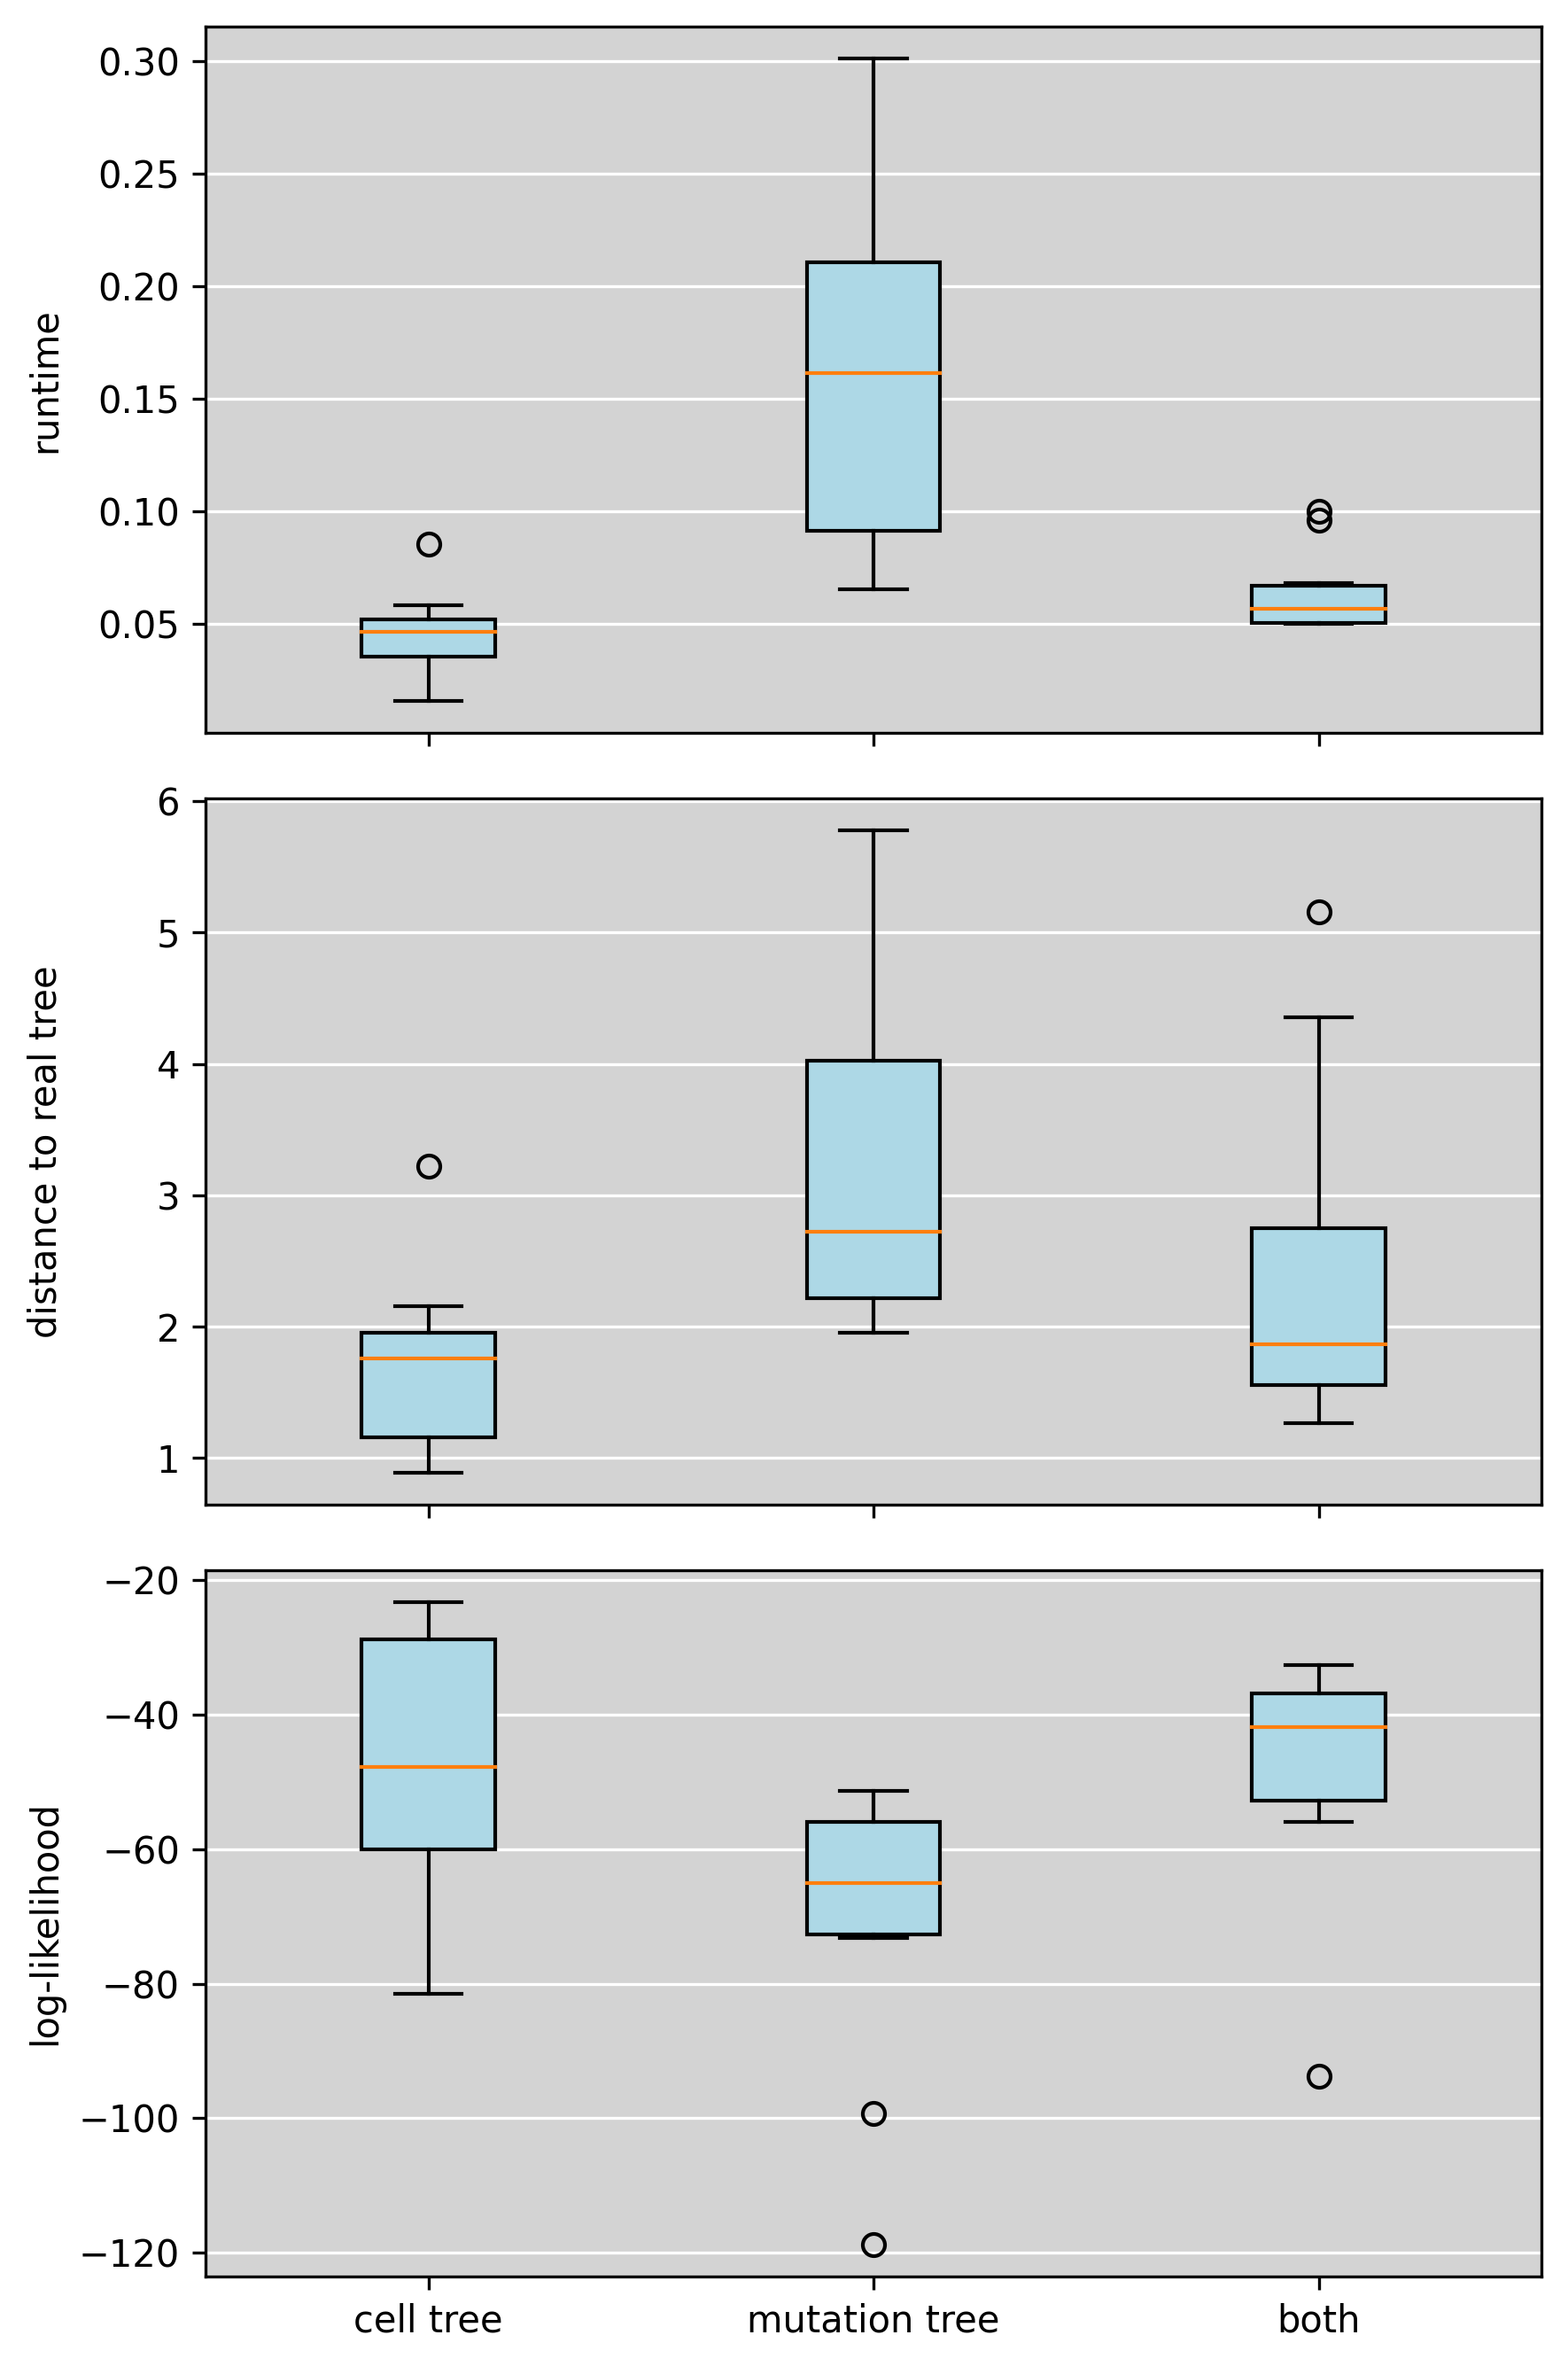

In [23]:
make_test_plots(outdir)